## Titanic - Machine Learning from Disaster 

In [530]:
#TODO:
#"The first MD –Mark Down cell of your submitted notebook has to include your full name, id number and a link to your Kaggle account."


### Part 1 Imports and Definitions


In [531]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection


# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20


- define the input and output folders


In [532]:
input_folder = "input/"

train_data_path = os.path.join(input_folder, "train.csv")
test_data_path = os.path.join(input_folder, "test.csv")

#### Load the traning data
- Print all the contect of the input folder


In [533]:
for dirname, _, filenames in os.walk(input_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))


input/test.csv
input/train.csv


- Load the csv data to variables

In [534]:
train_data = pd.read_csv(train_data_path)

test_data = pd.read_csv(test_data_path)


### Part 2 Data Investigation EDA


- Remove the columns that are not needed


In [535]:
DROP_DATA = ["PassengerId", "Name", "Ticket"]

def remove_Unused_Columns(data):
    data = data.drop(DROP_DATA, axis=1)
    return data



def convet_gender_to_numric(data):
    # Define a dictionary to map 'female' to 0 and 'male' to 1
    sex_mapping = {'female': 0, 'male': 1}

    # Apply the mapping to the 'Sex' column
    data['Sex'] = data['Sex'].map(sex_mapping)


- Remove the Name, Ticket, and PassengerId columns (save the passenger ID's from the test set to use later)

In [536]:
train_data = remove_Unused_Columns(train_data)

# passenger_ids save the passenger ids for the test data for the submission
passenger_ids = test_data['PassengerId']
test_data = remove_Unused_Columns(test_data)


- print the head of the train.csv file

In [537]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


- Convert Men/Women to 1/0

In [538]:
convet_gender_to_numric(train_data)

convet_gender_to_numric(test_data)

Get summary statistics for the training dataset show only the numerical columns


In [539]:
train_data.describe()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Get the number of missing values in the training dataset


In [540]:
display(train_data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

The dataset contains missing values in the following columns:

1) Age: 177 missing values
2) Cabin: 687 missing values (cabin has a lot of missing values)
3) Embarked: 2 missing values




- Get the data types of the columns in the training dataset


In [541]:
display(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


None

- We can see that most of the data is int64 or float64, only the Cabin and Embarked Are object types (String)

#### Display the features


In [542]:
def plot_and_calculate(df, column):
    # Plot the survival rate
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Survived', data=df)
    plt.title(f'Survival Rate by {column}')
    plt.show()

    # Group by column and 'Survived', then get the size of each group
    grouped = df.groupby([column, 'Survived']).size()

    # Calculate the percentage of survivors
    percentage_survived = grouped.xs(1, level='Survived') / grouped.groupby(level=column).sum() * 100

    # Print the percentage of survivors
    print(f"Percentage of survivors for each {column}:")
    print(percentage_survived)

- In this section, we will explore the relationship between the survival rate and some of the features in the dataset.
- After each graph, we will print the percentage of survivors for each category in the feature.

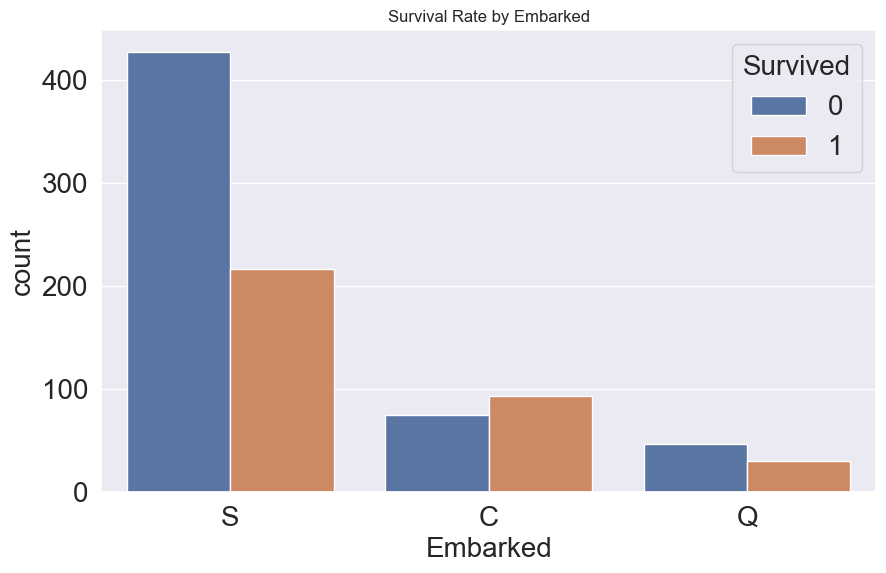

Percentage of survivors for each Embarked:
Embarked
C    55.357143
Q    38.961039
S    33.695652
dtype: float64


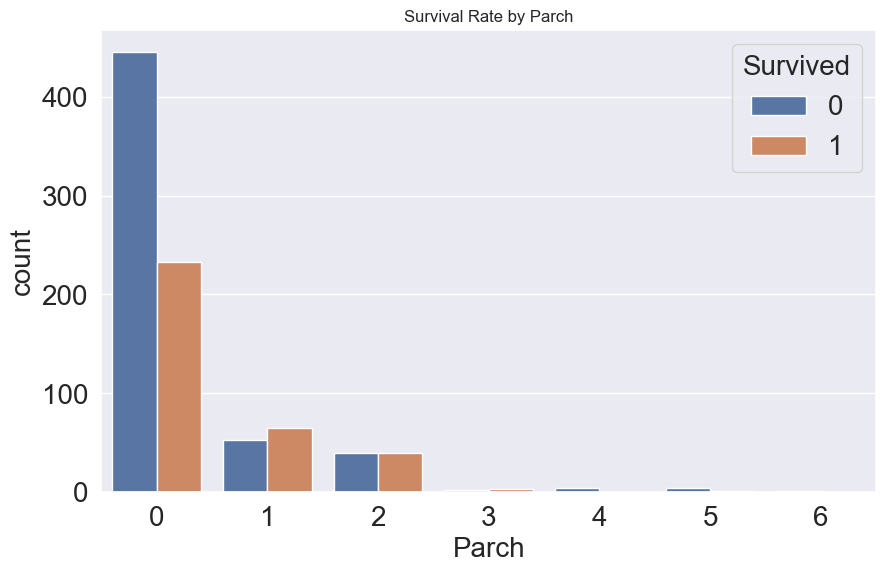

Percentage of survivors for each Parch:
Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4          NaN
5    20.000000
6          NaN
dtype: float64


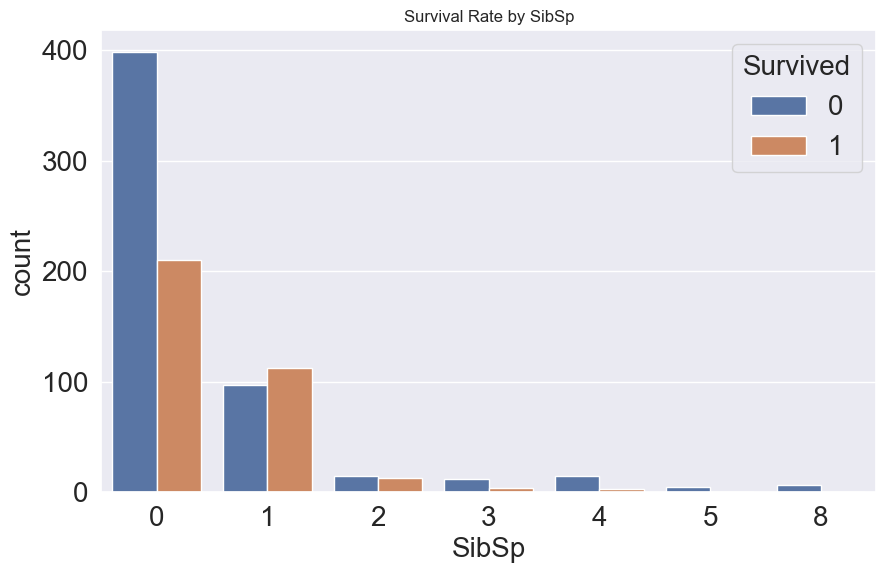

Percentage of survivors for each SibSp:
SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5          NaN
8          NaN
dtype: float64


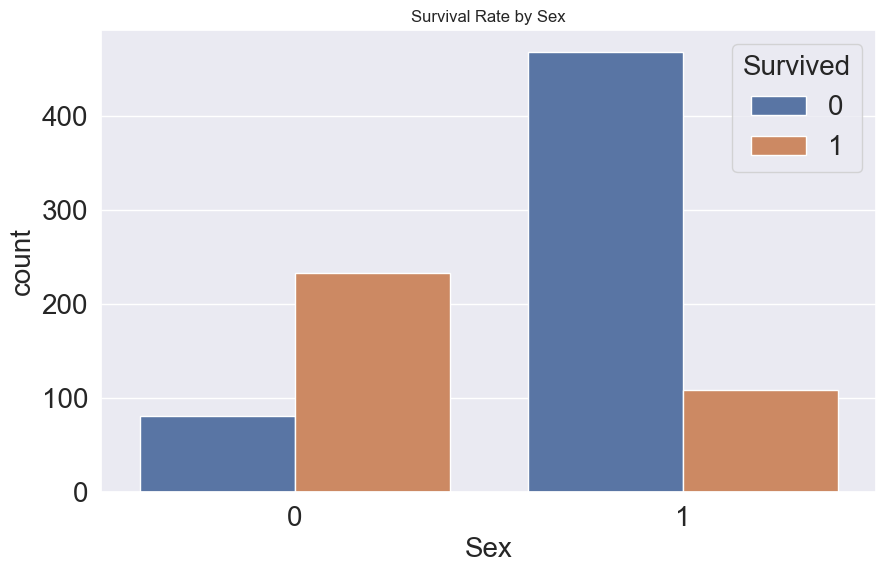

Percentage of survivors for each Sex:
Sex
0    74.203822
1    18.890815
dtype: float64


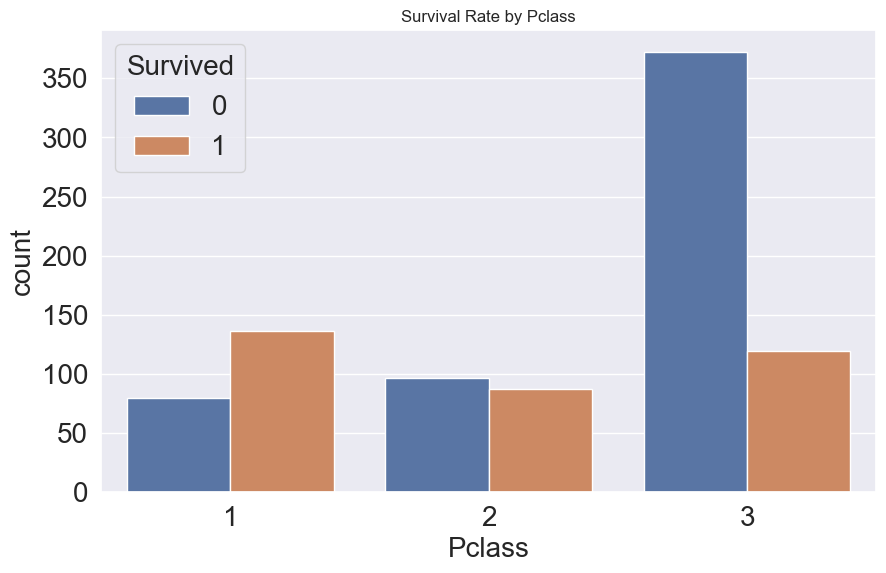

Percentage of survivors for each Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


In [543]:
plot_and_calculate(train_data, 'Embarked')
plot_and_calculate(train_data, 'Parch')
plot_and_calculate(train_data, 'SibSp')
plot_and_calculate(train_data, 'Sex')
plot_and_calculate(train_data, 'Pclass')


Now we can study from this graph
1) From port C more people survived but from S and Q most of the people died
2) Most women survived (74%)
3) Most people from Pclass 1 survived (63%) but most people from Pclass 3 died (76% died)

**Pairplot Visualizing Correlation**

- Now we will display the pairplot of the data we can see the correlation between the features

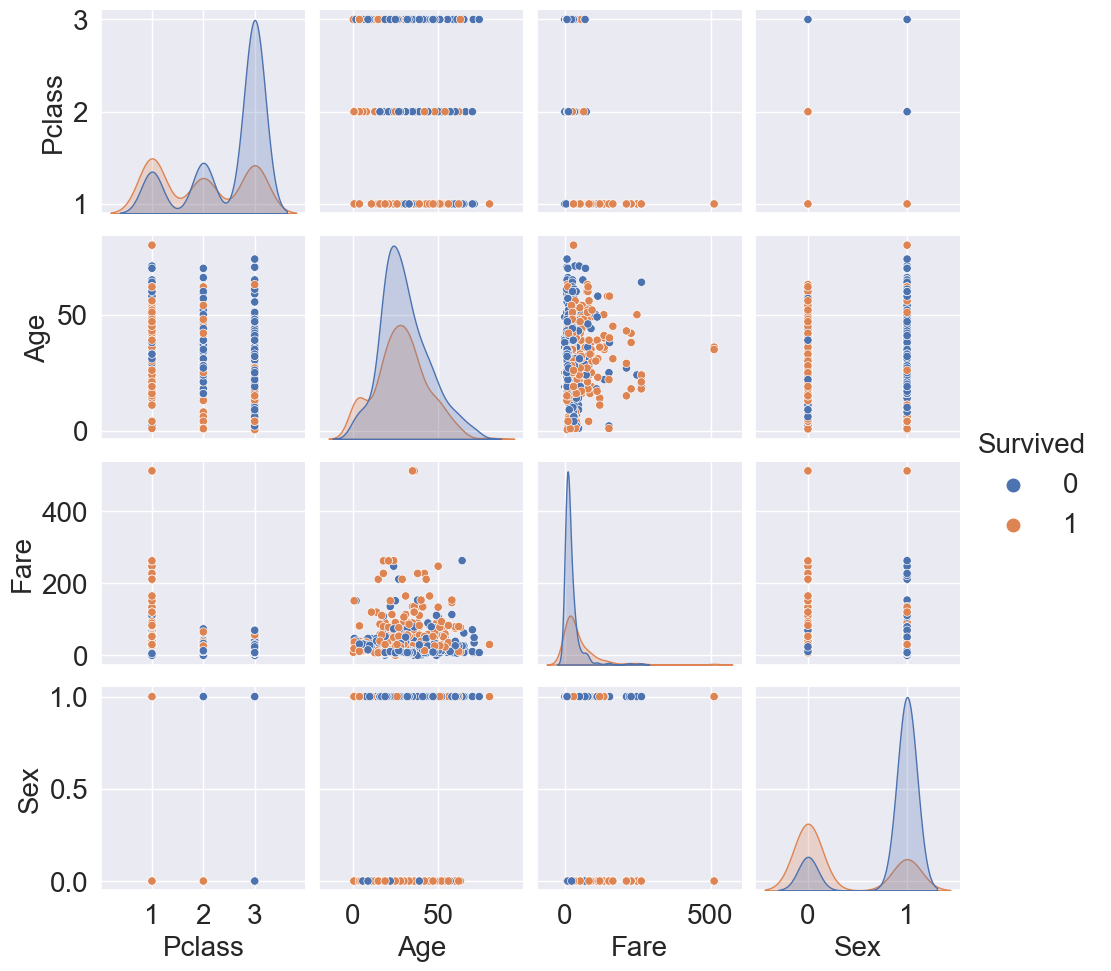

In [544]:
sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']], hue='Survived')
plt.show()

**Heatmap for correlation matrix**


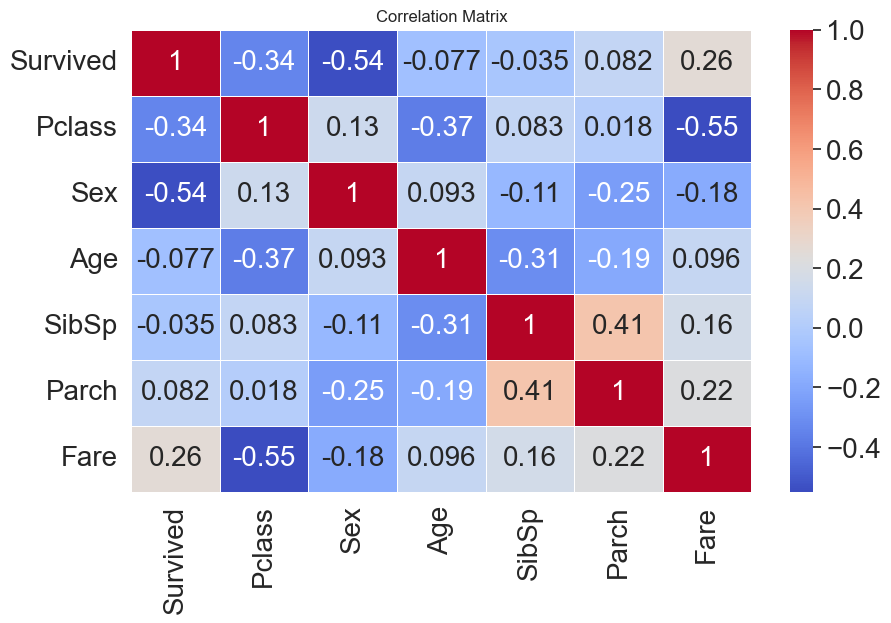

In [545]:
plt.figure(figsize=(10, 6))
corr_matrix = train_data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Part 3 Data Cleaning and Preprocessing

Check for missing values in the train dataset


In [546]:
print(train_data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Fill Missing Values
- Categorical columns with the most frequent value 
- Numerical columns with the mean
- Drop the Cabin column due to too many missing value

In [547]:
from sklearn.impute import SimpleImputer

# fill missing values, the 


def fill_missing_values(data):
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data = handle_missing_values(data)
    return data

def drop_missing_values(data):
    data.drop(columns=['Cabin'], inplace=True)
    return data




def handle_missing_values(data):    
    # Impute numerical columns with mean
    imputer_num = SimpleImputer(strategy='mean')
    data[data.select_dtypes(include=['number']).columns] = imputer_num.fit_transform(data.select_dtypes(include=['number']))
    
    # Impute categorical columns with constant value 'missing'
    imputer_cat = SimpleImputer(strategy='constant', fill_value='missing')
    data[data.select_dtypes(exclude=['number']).columns] = imputer_cat.fit_transform(data.select_dtypes(exclude=['number']))
    
    return data



In [548]:
train_data = drop_missing_values(train_data)
train_data = fill_missing_values(train_data)

# test data
test_data = drop_missing_values(test_data)
test_data = fill_missing_values(test_data)


In [549]:
print(train_data.isnull().sum())

print(test_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Convert Categorical Variables into Numerical Values
- Embarked use One-hot encode

In [550]:
def encode_categorical(data):
    # One-hot encode the categorical columns
    data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
    return data

In [551]:
train_data = encode_categorical(train_data)

test_data = encode_categorical(test_data)


In [552]:
print(train_data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


Standardize Numerical Features
- Standardize Age and Fare to have a mean of 0 and a standard deviation of 1.

In [553]:
from sklearn.preprocessing import StandardScaler

def scale_data(data):
    # Initialize the scaler
    scaler = StandardScaler()
    data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])
    return data

In [554]:
train_data = scale_data(train_data)

test_data = scale_data(test_data)


 Create New Features
 - Family Size from SibSp and Parch
 - Is Alone from the FamilySize
 - Remove SibSp and Parch columns becuse of the new features

In [555]:
def create_features(data):
    """
    Create new features for the dataset.
    """
    # Create FamilySize feature 
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

    # Create IsAlone feature
    data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

    return data

def drop_features(data):
    data.drop(columns=['SibSp', 'Parch'], inplace=True)
    return data
    

In [556]:
# train data
train_data = create_features(train_data)
train_data = drop_features(train_data)
# test data
test_data = create_features(test_data)
test_data = drop_features(test_data)


Final Dataset

In [557]:
print(train_data.head())

print("\n\nmissing values in train data:\n")
print(train_data.isnull().sum())


   Survived  Pclass  Sex       Age      Fare  Embarked_Q  Embarked_S  \
0       0.0     3.0  1.0 -0.592481 -0.502445           0           1   
1       1.0     1.0  0.0  0.638789  0.786845           0           0   
2       1.0     3.0  0.0 -0.284663 -0.488854           0           1   
3       1.0     1.0  0.0  0.407926  0.420730           0           1   
4       0.0     3.0  1.0  0.407926 -0.486337           0           1   

   FamilySize  IsAlone  
0         2.0        0  
1         2.0        0  
2         1.0        1  
3         2.0        0  
4         1.0        1  


missing values in train data:

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked_Q    0
Embarked_S    0
FamilySize    0
IsAlone       0
dtype: int64


### Part 4 Feature Selection

- Now we will search for the strongest features that affect the survival rate

Correlation matrix


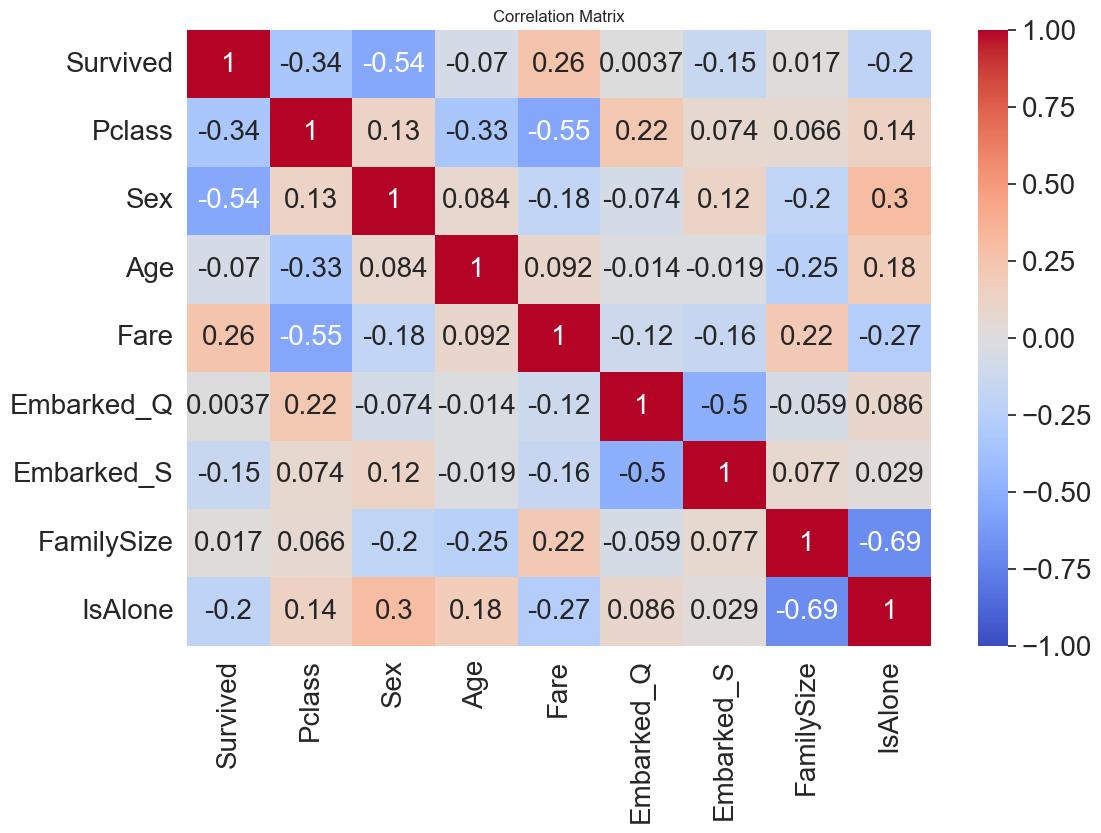

In [558]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Feature Selection using Logistic Regression Coefficients
- We will use logistic regression to see the coefficients of the features and their importance, then we will be able to select the most important features.

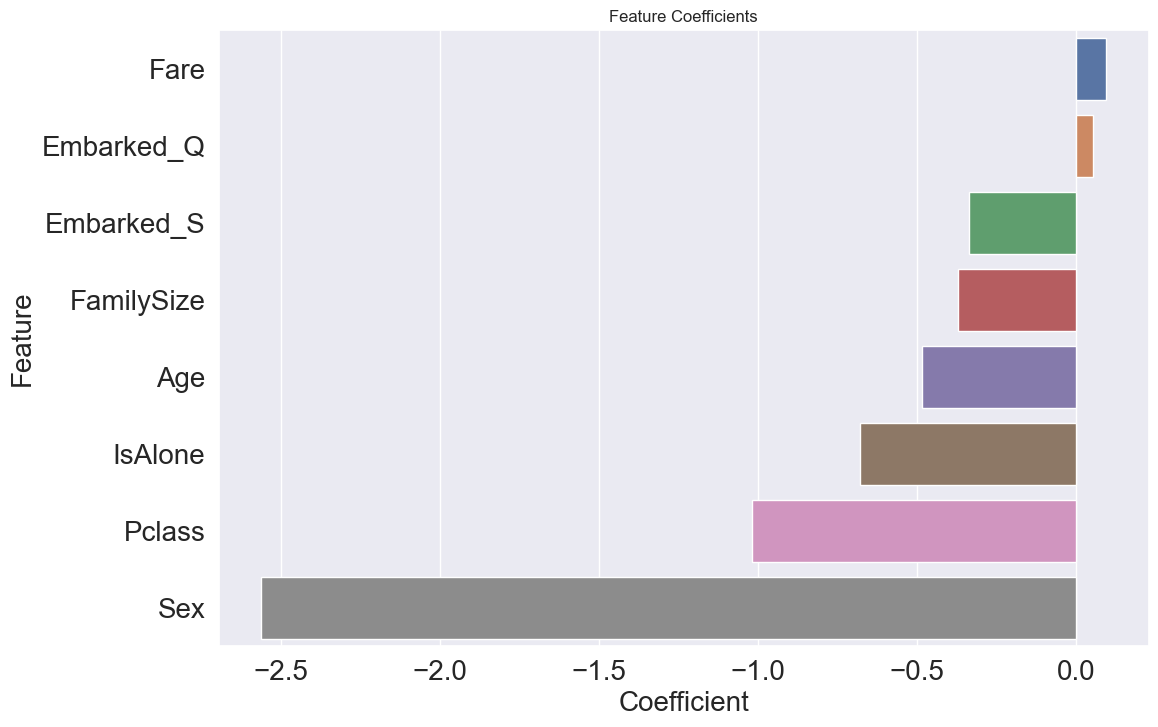

In [559]:
from sklearn.linear_model import LogisticRegression

# Select features and target
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

# Encode categorical variables
X = pd.get_dummies(X)

# Initialize and fit Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X, y)

# Get coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Coefficients')
plt.show()


Remove low coefficient data
- In this part we will remove the features that have a coefficient close to zero
- we can see that Fare feature has very low coefficient, so we can drop it


In [560]:
def drop_features_based_on_coefficients(data, coefficients):
    # Get features with coefficients above the threshold
    drop_features = ['Fare', 'Embarked_Q', 'Embarked_S']
    data.drop(columns=drop_features, inplace=True)
    
    return data

In [561]:
train_data = drop_features_based_on_coefficients(train_data, coefficients)
test_data = drop_features_based_on_coefficients(test_data, coefficients)


In [562]:
print(train_data.head())

print("\n\nmissing values in train data:\n")
print(train_data.isnull().sum())


   Survived  Pclass  Sex       Age  FamilySize  IsAlone
0       0.0     3.0  1.0 -0.592481         2.0        0
1       1.0     1.0  0.0  0.638789         2.0        0
2       1.0     3.0  0.0 -0.284663         1.0        1
3       1.0     1.0  0.0  0.407926         2.0        0
4       0.0     3.0  1.0  0.407926         1.0        1


missing values in train data:

Survived      0
Pclass        0
Sex           0
Age           0
FamilySize    0
IsAlone       0
dtype: int64


### Part 5 Model Selection and Training

In [563]:
print(train_data.head())


   Survived  Pclass  Sex       Age  FamilySize  IsAlone
0       0.0     3.0  1.0 -0.592481         2.0        0
1       1.0     1.0  0.0  0.638789         2.0        0
2       1.0     3.0  0.0 -0.284663         1.0        1
3       1.0     1.0  0.0  0.407926         2.0        0
4       0.0     3.0  1.0  0.407926         1.0        1


Fianl train features


In [564]:
train_features = train_data.drop(columns=['Survived'])

print(train_features.head())

   Pclass  Sex       Age  FamilySize  IsAlone
0     3.0  1.0 -0.592481         2.0        0
1     1.0  0.0  0.638789         2.0        0
2     3.0  0.0 -0.284663         1.0        1
3     1.0  0.0  0.407926         2.0        0
4     3.0  1.0  0.407926         1.0        1


Split the data
- Train size = 0.7
- Validation size = 0.3

In [565]:
from sklearn.model_selection import train_test_split

# Select features and target
X = train_features
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the split datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_validation.shape, y_validation.shape)


Train set shape: (623, 5) (623,)
Validation set shape: (268, 5) (268,)


Model Selection and Training
- Logistic Regression
- MLP

In [566]:
# Initialize models
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# logestic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# multi-layer perceptron model
mlp = MLPClassifier(max_iter=1000, random_state=42)  

# SGDClassifier model
sgd = SGDClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
mlp.fit(X_train, y_train)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

Print scores of the models on the validation set


In [567]:
# Evaluate models
log_reg_score = log_reg.score(X_validation, y_validation)
mlp_score = mlp.score(X_validation, y_validation)
sgd_score = sgd.score(X_validation, y_validation)

print("Logistic Regression Accuracy:", log_reg_score)
print("MLP Classifier Accuracy:", mlp_score)
print("SGD Classifier Accuracy:", sgd_score)

Logistic Regression Accuracy: 0.8208955223880597
MLP Classifier Accuracy: 0.8283582089552238
SGD Classifier Accuracy: 0.7201492537313433


In [568]:
# cross validation
from sklearn.model_selection import cross_val_score

# Cross validate the models
log_reg_scores = cross_val_score(log_reg, X, y, cv=5)
mlp_scores = cross_val_score(mlp, X, y, cv=5)
sgd_scores = cross_val_score(sgd, X, y, cv=5)

# Print the cross validation scores
print("Logistic Regression Cross Validation Scores:", log_reg_scores)
print("MLP Classifier Cross Validation Scores:", mlp_scores)
print("SGD Classifier Cross Validation Scores:", sgd_scores)

# Calculate the mean of the cross validation scores
log_reg_mean_score = log_reg_scores.mean()
mlp_mean_score = mlp_scores.mean()
sgd_mean_score = sgd_scores.mean()

print("\nLogistic Regression Mean Score:", log_reg_mean_score)
print("MLP Classifier Mean Score:", mlp_mean_score)
print("SGD Classifier Mean Score:", sgd_mean_score)



Logistic Regression Cross Validation Scores: [0.77653631 0.78651685 0.80337079 0.79213483 0.8258427 ]
MLP Classifier Cross Validation Scores: [0.82681564 0.80898876 0.82022472 0.80898876 0.84831461]
SGD Classifier Cross Validation Scores: [0.79888268 0.61235955 0.79213483 0.73595506 0.80337079]

Logistic Regression Mean Score: 0.7968802962776976
MLP Classifier Mean Score: 0.822666499278137
SGD Classifier Mean Score: 0.7485405812566694


The best model is the MLP Classifier now we will show the validation loss with different hidden layersm

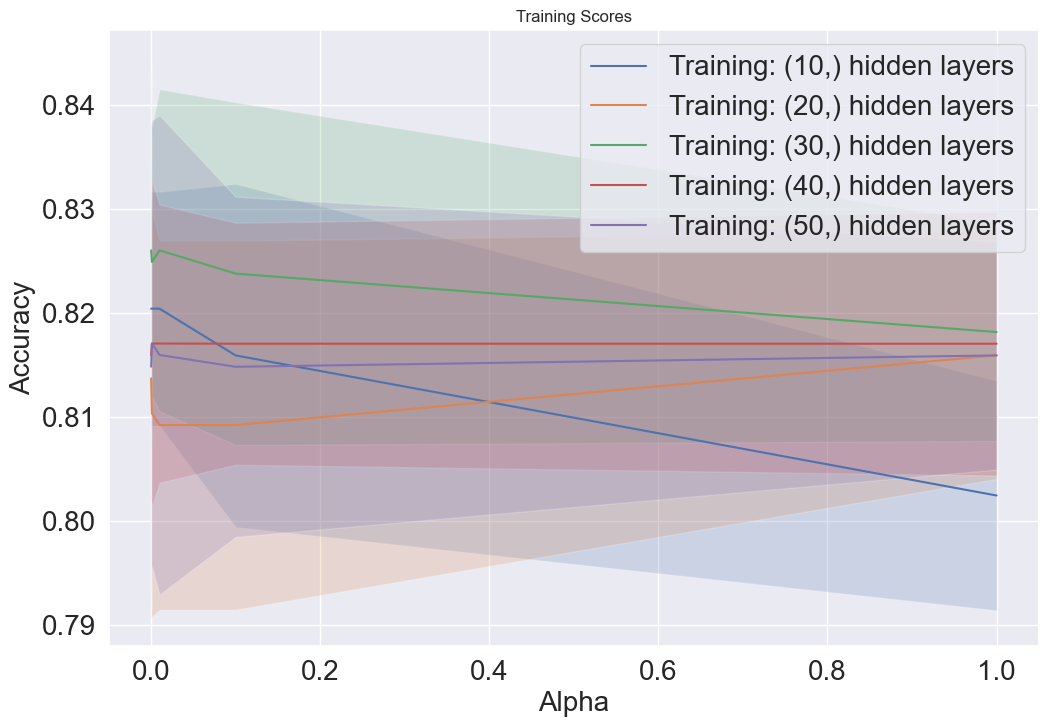

In [569]:
#Show graphs of the training loss and of the validation loss as a function of different hyper parameters values.

# Initialize the hyperparameters
hidden_layer_sizes = [(10,), (20,), (30,), (40,), (50,)]
alpha = [0.0001, 0.001, 0.01, 0.1, 1]

# Initialize lists to store the training and validation scores
train_scores = []
validation_scores = []

# Loop through the hyperparameters

for hidden_layer_size in hidden_layer_sizes:
    for a in alpha:
        # Initialize the model
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, alpha=a, max_iter=1000, random_state=42)
        
        # Cross validate the model
        scores = cross_val_score(mlp, X, y, cv=5)
        
        # Append the mean scores to the lists
        train_scores.append(scores.mean())
        validation_scores.append(scores.std())
        
# Convert the lists to NumPy arrays
train_scores = np.array(train_scores).reshape(len(hidden_layer_sizes), len(alpha))
validation_scores = np.array(validation_scores).reshape(len(hidden_layer_sizes), len(alpha))

# Plot the training and validation scores
plt.figure(figsize=(12, 8))
for i, hidden_layer_size in enumerate(hidden_layer_sizes):
    plt.plot(alpha, train_scores[i], label=f'Training: {hidden_layer_size} hidden layers')
    plt.fill_between(alpha, train_scores[i] - validation_scores[i], train_scores[i] + validation_scores[i], alpha=0.2)
plt.title('Training Scores')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [570]:
# select the best hyperparameters
best_hidden_layer_size = (30,)
best_alpha = 0.01

# Initialize the model
mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_size, alpha=best_alpha, max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
mlp_score = mlp.score(X_validation, y_validation)
print("MLP Classifier Accuracy:", mlp_score)

# Cross validate the model

mlp_scores = cross_val_score(mlp, X, y, cv=5)

# Print the cross validation scores
print("MLP Classifier Cross Validation Scores:", mlp_scores)
# Calculate the mean of the cross validation scores
mlp_mean_score = mlp_scores.mean()
print("\nMLP Classifier Mean Score:", mlp_mean_score)



MLP Classifier Accuracy: 0.8283582089552238
MLP Classifier Cross Validation Scores: [0.82681564 0.81460674 0.8258427  0.80898876 0.85393258]

MLP Classifier Mean Score: 0.826037285794991


### Part 6 Tests Model

- Run the model on test data

In [572]:

predictions = mlp.predict(test_data).astype(int)



- Create sumbission file for the test data

In [573]:
submission_df = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predictions})
submission_df.to_csv('submission.csv', index=False)



time = pd.Timestamp.now()
formatted_time = time.strftime('%H:%M:%S')
print(f"Your submission was successfully saved at time {formatted_time}")

Your submission was successfully saved at time 12:48:25
